# Gemini API: Grounding using Search as a tool

In this notebook you will learn how to use the new Google Search tool available in [Gemini](https://ai.google.dev/gemini-api/docs/models), using both the unary API and the Multimodal Live API. Check out the docs to learn more about using [Search as a tool](https://ai.google.dev/gemini-api/docs/google-search).


## Setup

### Install the Google GenAI SDK

Install the Google GenAI SDK from [npm](https://www.npmjs.com/package/@google/genai). 

```bash
$ npm install @google/genai
```

### Setup your API key

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.

Remember to treat your API key like a password. Don't accidentally save it in a notebook or source file you later commit to GitHub. In this notebook we will be storing the API key in a `.env` file. You can also set it as an environment variable or use a secret manager. 

Here's how to set it up in a `.env` file:

```bash
$ touch .env
$ echo "GEMINI_API_KEY=<YOUR_API_KEY>" >> .env
```

:::{.callout-tip}

Another option is to set the API key as an environment variable. You can do this in your terminal with the following command:

```bash
$ export GEMINI_API_KEY="<YOUR_API_KEY>"
```
:::

### Load the API key

To load the API key from the `.env` file, we will use the `dotenv` package. This package loads environment variables from a `.env` file into `process.env`. 

```bash
$ npm install dotenv
```

Then, we can load the API key in our code:


In [1]:
const dotenv = require("dotenv") as typeof import("dotenv");

dotenv.config({
  path: "../.env",
});

const GEMINI_API_KEY = process.env.GEMINI_API_KEY ?? "";
if (!GEMINI_API_KEY) {
  throw new Error("GEMINI_API_KEY is not set in the environment variables");
}
console.log("GEMINI_API_KEY is set in the environment variables");


GEMINI_API_KEY is set in the environment variables


:::{.callout-note}
In our particular case the `.env` is is one directory up from the notebook, hence we need to use `../` to go up one directory. If the `.env` file is in the same directory as the notebook, you can omit it altogether. 

```
│
├── .env
└── quickstarts
    └── Search_Grounding.ipynb
```
:::


### Initialize SDK Client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.


In [3]:
const google = require("@google/genai") as typeof import("@google/genai");

const ai = new google.GoogleGenAI({ apiKey: GEMINI_API_KEY });


### Select a model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](quickstarts/Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).


In [4]:
const tslab = require("tslab") as typeof import("tslab");

const MODEL_ID = "gemini-2.5-flash-preview-05-20";


## Use Google Search

Search grounding is particularly useful for queries that require current information or external knowledge. Using Google Search, Gemini can access nearly real-time information and better responses.


In [5]:
const grounded_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: "What was the latest Indian Premier League match and who won?",
  config: {
    tools: [{ googleSearch: {} }],
  },
});
tslab.display.markdown(grounded_response.text ?? "");

console.log(
  "Search Query:",
  JSON.stringify(grounded_response.candidates?.[0]?.groundingMetadata?.webSearchQueries, null, 2)
);
console.log(
  "Search Pages:",
  JSON.stringify(grounded_response.candidates?.[0]?.groundingMetadata?.groundingChunks, null, 2)
);

tslab.display.html(grounded_response.candidates?.[0]?.groundingMetadata?.searchEntryPoint?.renderedContent ?? "");


The latest Indian Premier League (IPL) match was the final of the IPL 2025 season, played on June 3, 2025. In this match, Royal Challengers Bengaluru (RCB) defeated Punjab Kings (PBKS) by 6 runs to win their first-ever IPL title. The final took place at the Narendra Modi Stadium in Ahmedabad.

Search Query: [
  "latest Indian Premier League match",
  "who won the latest IPL match",
  "When was the last IPL match played?",
  "Who won the 2024 IPL final?"
]
Search Pages: [
  {
    "web": {
      "uri": "https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQED1gBjfQR3VhZnkg_v0aF2J2OUGrGI8O-oemmw9DPSI6P2CdRjxdxCGVXlRbCwaSPYbS5uZCdqhm4ITGpreZyqIOyZjys6VqEKsCsg4LG83stZQnNPG1VYRRUTnl-S8a4sE6-IlKJafsOCEVTuvg==",
      "title": "adda247.com"
    }
  },
  {
    "web": {
      "uri": "https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGhicCsA4P1rmWqWXF4jZvyZDKu0McjkXMBMJJsCEZBIqfYrtHbsXh28_y64X1Z9wMO5FzHXkimu1KfFlUgVAqnZA2-ve8vEBqu7SbM_gurW51G8E4UZNfT6PmnIs24c-ChqbA2OEe7ZBTtO9HoswrXjsNTiNcq1jyxjJzItfbdlaSbEReqQ8JvxnQQ_oMiRZg=",
      "title": "jagranjosh.com"
    }
  },
  {
    "web": {
      "uri": "https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFMC1rTjxqoJt8Zd6FCbOrfbGAMTRpcPYKrFdmU86xkJVL-ff56NFVrTRgDa0OQeLPF2vAijDHMA3LtJVhKx0Vb

who won the latest IPL match 
 latest Indian Premier League match 
 When was the last IPL match played? 
 Who won the 2024 IPL final?

The information provided may be outdated, as it is based on a knowledge cutoff. For the most current and authoritative details, please refer to the official [Model documentation](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash), which includes the latest knowledge cutoff date.

You can see that running the same prompt without search grounding gives you outdated information:


In [6]:
const without_grounding_response = await ai.models.generateContent({
  model: MODEL_ID,
  contents: "What was the latest Indian Premier League match and who won?",
});
tslab.display.markdown(without_grounding_response.text ?? "");


The latest Indian Premier League (IPL) match was the **Final of the 2024 season**.

*   **Match:** Kolkata Knight Riders (KKR) vs. Sunrisers Hyderabad (SRH)
*   **Date:** May 26, 2024
*   **Venue:** M.A. Chidambaram Stadium, Chennai
*   **Winner:** **Kolkata Knight Riders (KKR)** won by 8 wickets.

## Use search in chat

Start by defining a helper function that you will use to display each part of the returned response.


In [5]:
import { GenerateContentResponse } from "@google/genai";

// eslint-disable-next-line complexity
function showParts(content: GenerateContentResponse) {
  const parts = content.candidates?.[0]?.content?.parts ?? [];
  if (parts.length === 0) {
    tslab.display.markdown("\n-------------------------------\n");
    tslab.display.markdown(`**Finish Reason:** ${content.candidates?.[0]?.finishReason ?? "unknown"}`);
    return;
  }
  for (const part of parts) {
    if (part.text) {
      tslab.display.markdown(part.text);
    } else if (part.executableCode) {
      tslab.display.markdown("\n-------------------------------\n");
      tslab.display.markdown(`\`\`\`python\n${part.executableCode.code}\n\`\`\``);
      tslab.display.markdown("\n-------------------------------\n");
    } else if (part.codeExecutionResult) {
      tslab.display.markdown("\n-------------------------------\n");
      tslab.display.markdown(`\`\`\`\n${part.codeExecutionResult.output}\n\`\`\``);
      tslab.display.markdown("\n-------------------------------\n");
    } else {
      console.log(JSON.stringify(part, null, 2));
    }
  }
  const groundingMetadata = content.candidates?.[0]?.groundingMetadata;
  if (groundingMetadata) {
    tslab.display.html(groundingMetadata.searchEntryPoint?.renderedContent ?? "");
  }
}


First try a query that needs realtime information, so you can see how the model performs without Google Search.


In [8]:
const chat = ai.chats.create({
  model: MODEL_ID,
});

const response_1 = await chat.sendMessage({
  message: "Who won the most recent Australia vs Chinese Taipei games?",
});
showParts(response_1);


Australia won both of the most recent games against Chinese Taipei in **men's football (soccer)**. These matches were part of the 2026 FIFA World Cup Qualifiers (AFC Second Round).

Here are the results:

1.  **November 16, 2023:** **Australia 7 - 0 Chinese Taipei** (Played in Melbourne, Australia)
2.  **June 6, 2024:** **Chinese Taipei 0 - 3 Australia** (Played in Taipei, Chinese Taipei)

Australia dominated both matches.

Now set up a new chat session that uses the `googleSearch` tool. The `showParts` helper will display the text output as well as any Google Search queries used in the results.


In [9]:
const chat_with_search = ai.chats.create({
  model: MODEL_ID,
  config: {
    tools: [{ googleSearch: {} }],
  },
});
const response_2 = await chat_with_search.sendMessage({
  message: "Who won the most recent Australia vs Chinese Taipei games?",
});
showParts(response_2);


Australia and Chinese Taipei have recently competed in various sports.

In women's futsal, Chinese Taipei defeated Australia 1-0 on May 10, 2025, in the AFC Women's Futsal Asian Cup 2025™.

In women's football (soccer), Australia Women played Chinese Taipei Women in two friendly matches in December 2024. Australia won both games, with scores of 3-1 on December 4, 2024, and 6-0 on December 7, 2024.

In men's basketball, Australia played Chinese Taipei on February 24, 2022, in a FIBA Asia Qualifier, where Australia won. For youth basketball, Australia U18 defeated Chinese Taipei U18 with a score of 113-48 on September 4, 2024. Additionally, there was a FIBA U17 Women's Basketball World Cup 2024 game between Australia and Chinese Taipei on July 17, 2024.

In men's volleyball, Australia defeated Chinese Taipei 3-0 on June 2, 2024.

In recent games between Australia and Chinese Taipei across various sports:

In **women's futsal**, Chinese Taipei defeated Australia 1-0 in their most recent match on May 10, 2025, during the AFC Women's Futsal Asian Cup 2025™.

In **women's football (soccer)**, Australia won both of their most recent friendly matches against Chinese Taipei in December 2024. Australia secured a 3-1 victory on December 4, 2024, and followed up with a 6-0 win on December 7, 2024.

In **men's basketball**, Australia defeated Chinese Taipei on February 24, 2022, in a FIBA Asia Qualifier. In youth basketball, Australia U18 won against Chinese Taipei U18 with a score of 113-48 on September 4, 2024. There was also a FIBA U17 Women's Basketball World Cup 2024 game between Australia and Chinese Taipei on July 17, 2024.

In **men's volleyball**, Australia won against Chinese Taipei with a score of 3-0 on June 2, 2024.

Australia vs Chinese Taipei basketball games results 
 most recent Australia vs Chinese Taipei soccer games results 
 Australia vs Chinese Taipei sports results

As you are using a `chat` session, you can ask the model follow-up questions too.


In [10]:
const response_3 = await chat_with_search.sendMessage({
  message: "Who scored the goals?",
});
showParts(response_3);


Here are the goal scorers for the most recent Australia vs Chinese Taipei games where goals were scored:

**Women's Futsal - AFC Women's Futsal Asian Cup 2025™ (May 10, 2025)**

*   **Chinese Taipei:** Liu Chih-Ling scored the lone goal in their 1-0 victory over Australia.

**Women's Football (Soccer) - International Friendlies (December 2024)**

*   **December 4, 2024 (Australia 3-1 Chinese Taipei):**
    *   **Australia:** Natasha Prior, Sharn Freier, and Bryleeh Henry.
    *   **Chinese Taipei:** Chen Jin-Wen (also referred to as Chen Ji-Wen).
*   **December 7, 2024 (Australia 6-0 Chinese Taipei):**
    *   **Australia:** Leah Davidson, Tameka Yallop, Emily Gielnik, Michelle Heyman, Natasha Prior, and Sharn Freier.

Australia Women vs Chinese Taipei Women December 7 2024 goal scorers 
 AFC Women's Futsal Asian Cup 2025 Chinese Taipei vs Australia goal scorers 
 Australia Women vs Chinese Taipei Women December 4 2024 goal scorers

## Plot search results

In this example you can see how to use the Google Search tool with code generation in order to plot results.


In [6]:
const movie_chat = ai.chats.create({
  model: MODEL_ID,
  config: {
    tools: [{ googleSearch: {} }],
  },
});
const movie_response = await movie_chat.sendMessage({
  message:
    "Generate some javascript code to plot the runtimes of the 10 more recent Denis Villeneuve movies. Write a server side function that generates the plot image and returns the `Buffer` object (Use quickchart.io).",
});
showParts(movie_response);


Denis Villeneuve has garnered significant acclaim for his cinematic works, with his more recent films often commanding substantial runtimes. The runtimes of his ten most recent feature films, from newest to oldest, are as follows:

*   **Dune: Part Two (2024)**: 166 minutes
*   **Dune (2021)**: 155 minutes
*   **Blade Runner 2049 (2017)**: 163 minutes
*   **Arrival (2016)**: 116 minutes
*   **Sicario (2015)**: 121 minutes
*   **Prisoners (2013)**: 153 minutes
*   **Enemy (2013)**: 90 minutes
*   **Incendies (2010)**: 130 minutes
*   **Polytechnique (2009)**: 77 minutes
*   **Maelström (2000)**: 88 minutes

Below is a server-side JavaScript function that generates a plot image of these runtimes using QuickChart.io and returns the image as a `Buffer` object.



```javascript
// Ensure you have 'node-fetch' installed: npm install node-fetch
const fetch = require('node-fetch');

/**
 * Generates a bar chart image of Denis Villeneuve's recent movie runtimes
 * using QuickChart.io and returns it as a Buffer.
 *
 * @returns {Promise<Buffer>} A Promise that resolves to a Buffer object
 *                            containing the chart image data.
 */
async function generateVilleneuveRuntimesPlot() {
    const moviesData = [
        { title: 'Dune: Part Two (2024)', runtime: 166 },
        { title: 'Dune (2021)', runtime: 155 },
        { title: 'Blade Runner 2049 (2017)', runtime: 163 },
        { title: 'Arrival (2016)', runtime: 116 },
        { title: 'Sicario (2015)', runtime: 121 },
        { title: 'Prisoners (2013)', runtime: 153 },
        { title: 'Enemy (2013)', runtime: 90 },
        { title: 'Incendies (2010)', runtime: 130 },
        { title: 'Polytechnique (2009)', runtime: 77 },
        { title: 'Maelström (2000)', runtime: 88 }
    ];

    const labels = moviesData.map(movie => movie.title);
    const data = moviesData.map(movie => movie.runtime);

    const chartConfig = {
        type: 'bar',
        data: {
            labels: labels,
            datasets: [{
                label: 'Runtime (minutes)',
                data: data,
                backgroundColor: 'rgba(75, 192, 192, 0.6)',
                borderColor: 'rgba(75, 192, 192, 1)',
                borderWidth: 1
            }]
        },
        options: {
            indexAxis: 'y', // Makes it a horizontal bar chart
            responsive: true,
            plugins: {
                title: {
                    display: true,
                    text: 'Runtimes of 10 Most Recent Denis Villeneuve Movies',
                    font: {
                        size: 20
                    }
                },
                legend: {
                    display: false
                }
            },
            scales: {
                x: {
                    beginAtZero: true,
                    title: {
                        display: true,
                        text: 'Runtime (minutes)'
                    }
                },
                y: {
                    title: {
                        display: true,
                        text: 'Movie Title'
                    }
                }
            }
        }
    };

    const quickChartUrl = 'https://quickchart.io/chart';

    try {
        const response = await fetch(quickChartUrl, {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json',
            },
            body: JSON.stringify({
                chart: chartConfig,
                width: 800,  // Adjust width as needed
                height: 600, // Adjust height as needed
                format: 'png',
                // Add any other QuickChart.io options here
            }),
        });

        if (!response.ok) {
            throw new Error(`QuickChart.io API error: ${response.statusText}`);
        }

        // QuickChart.io returns the image directly in the response body
        const imageBuffer = await response.buffer();
        return imageBuffer;

    } catch (error) {
        console.error('Error generating chart:', error);
        throw error; // Re-throw the error for the caller to handle
    }
}

// Example usage (for testing purposes, if you run this in a Node.js environment):
// (async () => {
//     try {
//         const imageBuffer = await generateVilleneuveRuntimesPlot();
//         require('fs').writeFileSync('villeneuve_runtimes_plot.png', imageBuffer);
//         console.log('Plot image generated and saved as villeneuve_runtimes_plot.png');
//     } catch (err) {
//         console.error('Failed to generate plot:', err);
//     }
// })();
```

quickchart.io node.js example buffer 
 Maelström 2000 runtime 
 Sicario 2015 runtime 
 Dune Part Two runtime 
 Dune 2021 runtime 
 Polytechnique 2009 runtime 
 Incendies 2010 runtime 
 Enemy 2013 runtime

First review the supplied code to make sure it does what you expect, then copy it here to try out the chart.


JavaScript code executed successfully


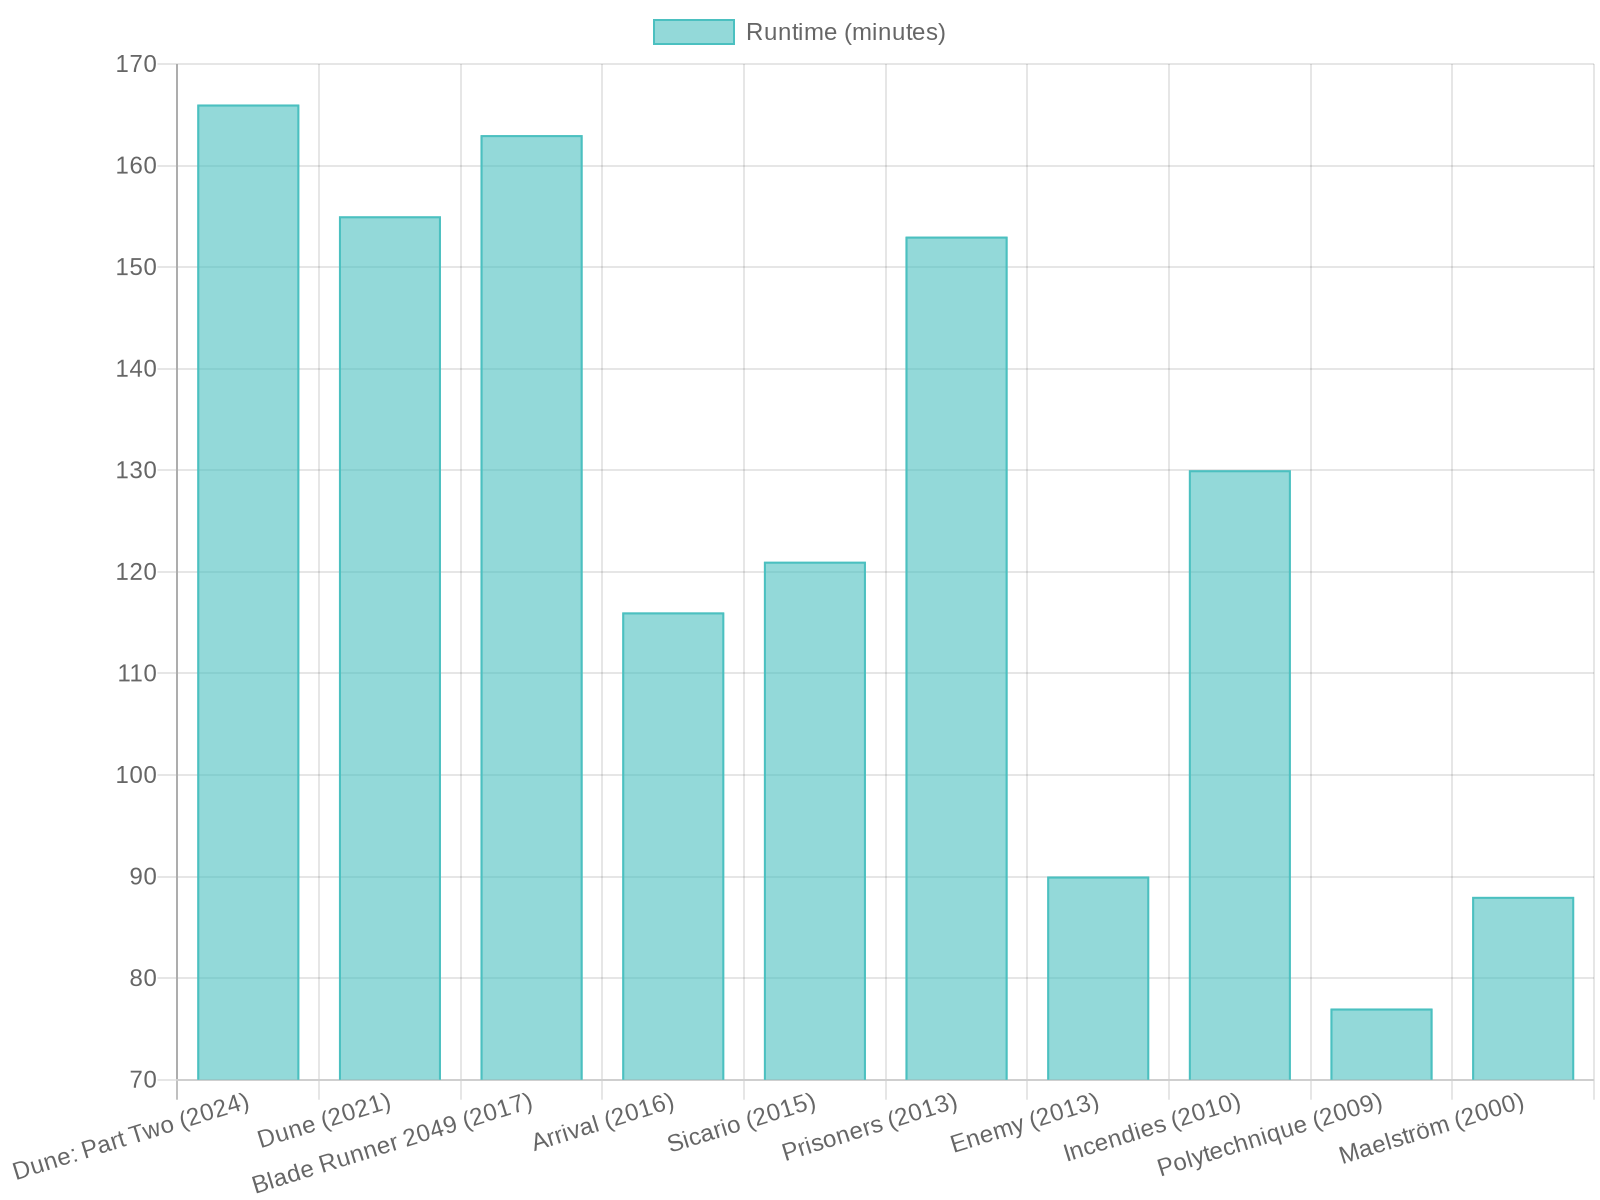

In [19]:
const jsCodeBlock = movie_response.text?.match(/```javascript\n([\s\S]*?)\n```/);
const jsCode = jsCodeBlock ? jsCodeBlock[1] : "";
const wrappedJsCode = `
    ${jsCode}

    const tslab = require("tslab");
    generateVilleneuveRuntimesPlot().then((buffer) => {
        tslab.display.png(new Uint8Array(buffer));
    }).catch((err) => {
        console.error(err);
    });
    console.log("JavaScript code executed successfully");
`;
// eslint-disable-next-line no-eval
eval(wrappedJsCode);


One feature of using a chat conversation to do this is that you can now ask the model to make changes.


In [20]:
const movie_response_1 = await movie_chat.sendMessage({
  message: "Looks great! Can you give the chart a dark theme instead?",
});
showParts(movie_response_1);


To give the chart a dark theme, we need to adjust the colors of various elements within the `chartConfig` object, including the background, text (title, labels, tick marks), and grid lines.

Here's the updated JavaScript code for the server-side function:



```javascript
// Ensure you have 'node-fetch' installed: npm install node-fetch
const fetch = require('node-fetch');

/**
 * Generates a bar chart image of Denis Villeneuve's recent movie runtimes
 * using QuickChart.io and returns it as a Buffer, with a dark theme.
 *
 * @returns {Promise<Buffer>} A Promise that resolves to a Buffer object
 *                            containing the chart image data.
 */
async function generateVilleneuveRuntimesPlotDarkTheme() {
    const moviesData = [
        { title: 'Dune: Part Two (2024)', runtime: 166 },
        { title: 'Dune (2021)', runtime: 155 },
        { title: 'Blade Runner 2049 (2017)', runtime: 163 },
        { title: 'Arrival (2016)', runtime: 116 },
        { title: 'Sicario (2015)', runtime: 121 },
        { title: 'Prisoners (2013)', runtime: 153 },
        { title: 'Enemy (2013)', runtime: 90 },
        { title: 'Incendies (2010)', runtime: 130 },
        { title: 'Polytechnique (2009)', runtime: 77 },
        { title: 'Maelström (2000)', runtime: 88 }
    ];

    const labels = moviesData.map(movie => movie.title);
    const data = moviesData.map(movie => movie.runtime);

    const chartConfig = {
        type: 'bar',
        data: {
            labels: labels,
            datasets: [{
                label: 'Runtime (minutes)',
                data: data,
                backgroundColor: 'rgba(100, 149, 237, 0.7)', // DodgerBlue with transparency
                borderColor: 'rgba(100, 149, 237, 1)',
                borderWidth: 1
            }]
        },
        options: {
            indexAxis: 'y', // Makes it a horizontal bar chart
            responsive: true,
            // Global font color for the entire chart (titles, labels, ticks)
            color: '#E0E0E0', // Light grey for all text [1]
            plugins: {
                title: {
                    display: true,
                    text: 'Runtimes of 10 Most Recent Denis Villeneuve Movies',
                    font: {
                        size: 20,
                        color: '#FFFFFF' // White title [1]
                    }
                },
                legend: {
                    display: false
                }
            },
            scales: {
                x: {
                    beginAtZero: true,
                    title: {
                        display: true,
                        text: 'Runtime (minutes)',
                        color: '#E0E0E0' // Light grey axis title
                    },
                    ticks: {
                        color: '#E0E0E0' // Light grey tick labels
                    },
                    grid: {
                        color: 'rgba(200, 200, 200, 0.2)' // Subtle light grey grid lines [5, 7]
                    }
                },
                y: {
                    title: {
                        display: true,
                        text: 'Movie Title',
                        color: '#E0E0E0' // Light grey axis title
                    },
                    ticks: {
                        color: '#E0E0E0' // Light grey tick labels
                    },
                    grid: {
                        color: 'rgba(200, 200, 200, 0.2)' // Subtle light grey grid lines [5, 7]
                    }
                }
            }
        },
        // QuickChart.io specific option for chart background color
        backgroundColor: '#333333' // Dark grey background for the entire chart image [13]
    };

    const quickChartUrl = 'https://quickchart.io/chart';

    try {
        const response = await fetch(quickChartUrl, {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json',
            },
            body: JSON.stringify({
                chart: chartConfig,
                width: 800,
                height: 600,
                format: 'png',
                // You can also set a background color here if not using chart.options.plugins.chartArea.backgroundColor
                // For QuickChart.io, the 'backgroundColor' parameter outside 'chart' config sets the canvas background [9]
                backgroundColor: '#282828' // Even darker background for the canvas itself (if different from chartArea)
            }),
        });

        if (!response.ok) {
            throw new Error(`QuickChart.io API error: ${response.statusText}`);
        }

        const imageBuffer = await response.buffer();
        return imageBuffer;

    } catch (error) {
        console.error('Error generating chart:', error);
        throw error;
    }
}

// Example usage (for testing purposes, if you run this in a Node.js environment):
// (async () => {
//     try {
//         const imageBuffer = await generateVilleneuveRuntimesPlotDarkTheme();
//         require('fs').writeFileSync('villeneuve_runtimes_plot_dark.png', imageBuffer);
//         console.log('Dark theme plot image generated and saved as villeneuve_runtimes_plot_dark.png');
//     } catch (err) {
//         console.error('Failed to generate dark theme plot:', err);
//     }
// })();
```

chart.js dark theme options 
 quickchart.io dark theme example chart.js 
 chart.js global options background color

JavaScript code executed successfully


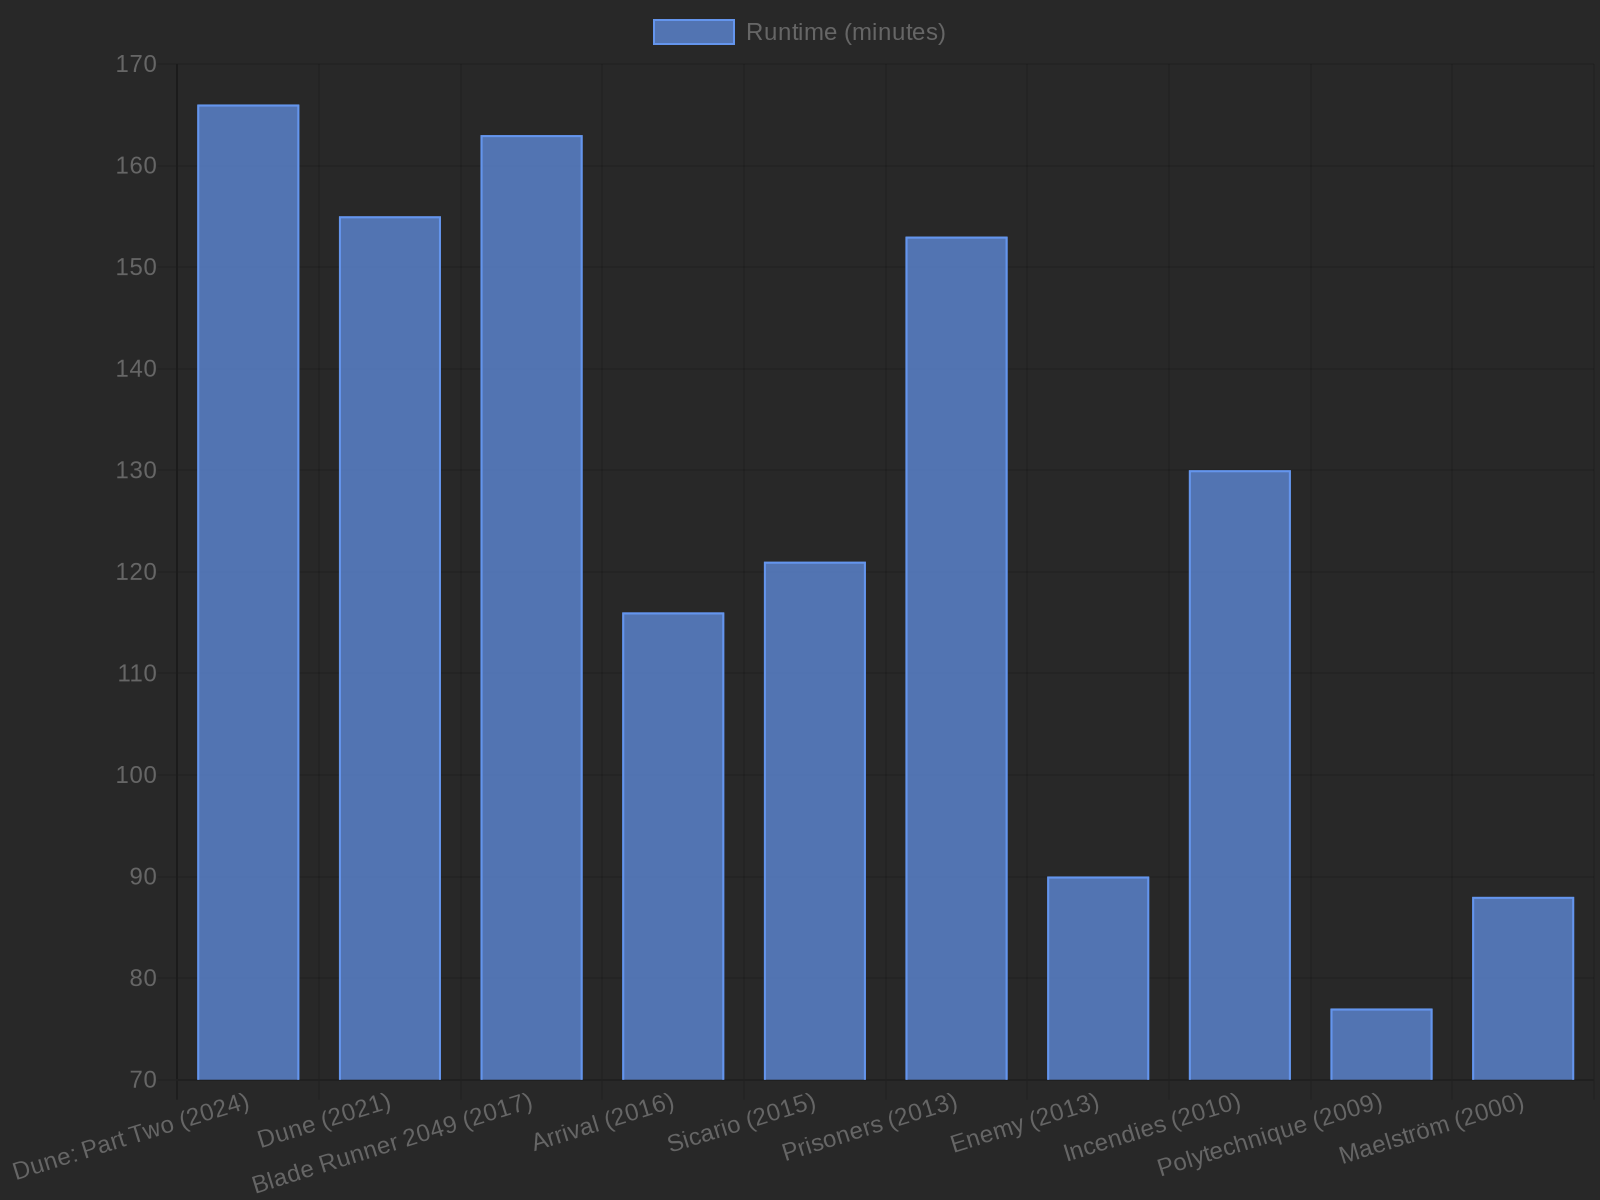

In [22]:
const darkJsCodeBlock = movie_response_1.text?.match(/```javascript\n([\s\S]*?)\n```/);
const darkJsCode = darkJsCodeBlock ? darkJsCodeBlock[1] : "";
const wrappedDarkJsCode = `
    ${darkJsCode}

    const tslab = require("tslab");
    generateVilleneuveRuntimesPlotDarkTheme().then((buffer) => {
        tslab.display.png(new Uint8Array(buffer));
    }).catch((err) => {
        console.error(err);
    });
    console.log("JavaScript code executed successfully");
`;
// eslint-disable-next-line no-eval
eval(wrappedDarkJsCode);


## Use search in the Multimodal Live API

The Search tool can be used in a live streaming context to have the model formulate grounded responses during the conversation.


In [23]:
const LIVE_MODEL_ID = "gemini-2.0-flash-live-001";


### Define some helpers

You’re going to use the Live API’s audio output, the easiest way hear it in Colab is to write the PCM data out as a WAV file:


In [24]:
const fs = require("fs") as typeof import("fs");
const path = require("path") as typeof import("path");
const wave = require("wavefile") as typeof import("wavefile");

function saveAudioToFile(audioData: Int16Array, filePath: string) {
  fs.mkdirSync(path.dirname(filePath), { recursive: true });
  const wav = new wave.WaveFile();
  wav.fromScratch(1, 24000, "16", audioData);
  fs.writeFileSync(filePath, wav.toBuffer());
  console.debug(`Audio saved to ${filePath}`);
}


To use the bi-directional streaming API in Colab, you will buffer the audio stream. Define a `handleServerContent` and `handleToolCall` helper functions to handle the server content and tool calls, respectively. These will be used to process the text, code, tool calls, and html content returned by the model.

As each of the following examples only use a single prompt, also define a `run` helper to wrap the setup and prompt execution steps into a single function call. This helper takes a `prompt`, response `modality` and `tools` to use, and returns the response text or audio based on the modality.


In [40]:
import { FunctionResponse, LiveServerContent, LiveServerToolCall, Modality, Session, Tool } from "@google/genai";

function handleServerContent(content: LiveServerContent) {
  if (content.modelTurn) {
    for (const turn of content.modelTurn.parts ?? []) {
      if (turn.executableCode) {
        tslab.display.markdown("-------------------------------");
        tslab.display.markdown(`\`\`\`python\n${turn.executableCode.code}\n\`\`\``);
        tslab.display.markdown("-------------------------------");
      }
      if (turn.codeExecutionResult) {
        tslab.display.markdown("-------------------------------");
        tslab.display.markdown(`\`\`\`\n${turn.codeExecutionResult.output}\n\`\`\``);
        tslab.display.markdown("-------------------------------");
      }
    }
  }
  if (content.groundingMetadata) {
    tslab.display.html(content.groundingMetadata.searchEntryPoint?.renderedContent ?? "");
  }
}

function handleToolCall(session: Session, toolCall: LiveServerToolCall) {
  const responses: FunctionResponse[] = [];
  for (const fc of toolCall.functionCalls ?? []) {
    console.log("Tool call:", JSON.stringify(fc, null, 2));
    responses.push({
      id: fc.id,
      name: fc.name,
      response: {
        result: "ok",
      },
    });
  }
  console.log("Tool call responses:", JSON.stringify(responses, null, 2));
  session.sendToolResponse({
    functionResponses: responses,
  });
}

async function run(prompt: string, modality: Modality = Modality.TEXT, tools: Tool[] = []) {
  const audioData: number[] = [];
  const audioFileName = `audio-${Date.now()}.wav`;
  let completed = false;
  const session = await ai.live.connect({
    model: LIVE_MODEL_ID,
    callbacks: {
      onopen: () => {
        console.log("Connection opened");
      },
      onclose: () => {
        console.log("Connection closed");
      },
      onerror: (error) => {
        console.error("Error:", error.message);
      },
      onmessage: (message) => {
        if (message.text) {
          tslab.display.markdown(message.text);
          return;
        }
        if (message.data) {
          const audioBuffer = Buffer.from(message.data, "base64");
          const audio = new Int16Array(
            audioBuffer.buffer,
            audioBuffer.byteOffset,
            audioBuffer.length / Int16Array.BYTES_PER_ELEMENT
          );
          audioData.push(...audio);
          return;
        }
        if (message.serverContent) {
          handleServerContent(message.serverContent);
          if (message.serverContent.turnComplete) {
            completed = true;
          }
          return;
        }
        if (message.toolCall) {
          handleToolCall(session, message.toolCall);
          completed = true;
          return;
        }
      },
    },
    config: {
      tools: tools,
      responseModalities: [modality],
    },
  });
  console.log("Prompt: ", prompt);
  session.sendClientContent({
    turns: [prompt],
    turnComplete: true,
  });
  // eslint-disable-next-line @typescript-eslint/no-unnecessary-condition
  while (!completed) {
    await new Promise((resolve) => setTimeout(resolve, 100));
  }
  if (audioData.length > 0) {
    const audioFilePath = path.join("../assets/live", audioFileName);
    saveAudioToFile(new Int16Array(audioData), audioFilePath);
    console.log(`Audio saved to ${audioFileName}`);
    tslab.display.html(
      `<audio controls><source src="${audioFilePath}" type="audio/wav">Your browser does not support the audio element.</audio>`
    );
  }
  console.log("Session completed");
  session.close();
}


### Stream with the Search tool

First, execute a query without the Search tool to observe the model's response to a time-sensitive query.

Note that the Multimodal Live API is a 2-way streaming API, but to simplify running in a notebook, each audio response is buffered and played once it has been fully streamed, so you will need to wait a few seconds before the response starts to play.


In [35]:
const _warn_fn = console.warn;
// eslint-disable-next-line no-empty-function, @typescript-eslint/no-empty-function
console.warn = () => {};
await run("Who won the skateboarding gold medals in the 2024 olympics?", google.Modality.AUDIO);


Connection opened
Prompt:  Who won the skateboarding gold medals in the 2024 olympics?
Audio saved to ../assets/live/audio-1750287796747.wav
Audio saved to audio-1750287796747.wav


Your browser does not support the audio element.

Session completed


Connection closed


Now re-run with the Search tool enabled.


In [37]:
await run("Who won the skateboarding gold medals in the 2024 olympics?", google.Modality.AUDIO, [{ googleSearch: {} }]);


Connection opened
Prompt:  Who won the skateboarding gold medals in the 2024 olympics?


-------------------------------

```python
print(google_search.search(queries=["who won skateboarding gold medals 2024 Olympics"]))

```

-------------------------------

-------------------------------

```
Looking up information on Google Search.

```

-------------------------------

who won skateboarding gold medals 2024 Olympics

Audio saved to ../assets/live/audio-1750287874770.wav
Audio saved to audio-1750287874770.wav


Your browser does not support the audio element.

Session completed


Connection closed


### Search with custom tools

In the Multimodal Live API, the Search tool can be used in conjunction with other tools, including function calls that you provide to the model.

In this example, you define a function `set_climate` that takes 2 parameters, `mode` (`hot`, `cold`, etc) and `strength` (0-10), and ask the model to set the climate control based on the live weather in the location you specify.


In [42]:
import { FunctionDeclaration, Tool, Type } from "@google/genai";

const set_climate: FunctionDeclaration = {
  name: "set_climate",
  description: "Switches the local climate control equipment to the specified parameters.",
  parameters: {
    type: Type.OBJECT,
    properties: {
      mode: {
        type: Type.STRING,
        description: "Mode for the climate unit - whether to heat, cool or just blow air.",
        enum: ["hot", "cold", "fan", "off"],
      },
      strength: {
        type: Type.NUMBER,
        description: "Intensity of the climate to apply, 0-10 (0 is off, 10 is MAX).",
        minimum: 0,
        maximum: 10,
      },
    },
    required: ["mode", "strength"],
  },
};
const custom_tools: Tool[] = [{ functionDeclarations: [set_climate] }, { googleSearch: {} }];
await run(
  "Look up the weather in Paris using search and set my climate control appropriately.",
  google.Modality.AUDIO,
  custom_tools
);


Connection opened
Prompt:  Look up the weather in Paris using search and set my climate control appropriately.


-------------------------------

```python
print(google_search.search(queries=["weather in Paris", "appropriate climate control for current Paris weather"]))

```

-------------------------------

-------------------------------

```
Looking up information on Google Search.

```

-------------------------------

Tool call: {
  "id": "function-call-8152628869044170596",
  "args": {
    "mode": "cold",
    "strength": 3
  },
  "name": "set_climate"
}
Tool call responses: [
  {
    "id": "function-call-8152628869044170596",
    "name": "set_climate",
    "response": {
      "result": "ok"
    }
  }
]
Audio saved to ../assets/live/audio-1750288452152.wav
Audio saved to audio-1750288452152.wav


Your browser does not support the audio element.

Session completed


Connection closed


## Next steps

- For more demos showcasing multi-tool use in the Multimodal Live API, check out the [Plotting and Mapping cookbook](h../examples/LiveAPI_plotting_and_mapping.ipynb).
- To get started with the Live API with the JS SDK, check out the [starter guide](Get_started_LiveAPI.ipynb).
- To learn more about tool use in the Live API, check out the [Live API Tool Use cookbook](Get_started_LiveAPI_tools.ipynb).

Also check the other Gemini advanced capabilities (like [spatial understanding](Spatial_understanding.ipynb)) that you can find in the Gemini Cookbook.
